In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from collections import Counter
import networkx as nx
from scipy import stats

### Reading already parsed datasets

In [2]:
NY_df = pd.read_csv('data/newyork_dataset', sep=',',low_memory=False, header=0, encoding='utf8')
CHI_df = pd.read_csv('data/chicago_dataset', sep=',',low_memory=False, header=0, encoding='utf8')
BOS_df = pd.read_csv('data/boston_dataset', sep=',',low_memory=False, header=0, encoding='utf8')

Number of station - nodes for each dataset

In [3]:
print('NY: # start stations =',(NY_df['start station name'].nunique()), '; # end stations =',(NY_df['end station name'].nunique()))
print('CHI: # start stations =',(CHI_df['start station name'].nunique()), '; # end stations =',(CHI_df['end station name'].nunique()))
print('BOS: # start stations =',(BOS_df['start station name'].nunique()), '; # end stations =',(BOS_df['end station name'].nunique()))

NY: # start stations = 784 ; # end stations = 791
CHI: # start stations = 571 ; # end stations = 569
BOS: # start stations = 268 ; # end stations = 268


### Adjacency matrices

In [8]:
NY_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start hour,week day
0,88,2019-04-01 00:00:14.741,2019-04-01 00:01:42.8900,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,36515,Subscriber,1982,1,0,0
1,443,2019-04-01 00:00:20.827,2019-04-01 00:07:44.2920,254,W 11 St & 6 Ave,40.735324,-73.998004,540,Lexington Ave & E 29 St,40.743116,-73.982154,17406,Subscriber,1983,1,0,0
2,662,2019-04-01 00:00:30.996,2019-04-01 00:11:33.2610,3244,University Pl & E 8 St,40.731437,-73.994903,3244,University Pl & E 8 St,40.731437,-73.994903,20775,Subscriber,1988,1,0,0
3,86,2019-04-01 00:00:30.911,2019-04-01 00:01:56.9600,526,E 33 St & 5 Ave,40.747659,-73.984907,474,5 Ave & E 29 St,40.745168,-73.986831,36270,Subscriber,1982,1,0,0
4,136,2019-04-01 00:00:32.593,2019-04-01 00:02:49.3910,461,E 20 St & 2 Ave,40.735877,-73.982050,504,1 Ave & E 16 St,40.732219,-73.981656,36051,Subscriber,1986,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766089,516,2019-04-30 23:59:33.752,2019-05-01 00:08:10.1700,397,Fulton St & Clermont Ave,40.684157,-73.969223,3232,Bond St & Fulton St,40.689622,-73.983043,15005,Subscriber,1983,1,23,1
1766090,435,2019-04-30 23:59:35.085,2019-05-01 00:06:50.4610,432,E 7 St & Avenue A,40.726218,-73.983799,349,Rivington St & Ridge St,40.718502,-73.983299,27227,Subscriber,1992,1,23,1
1766091,564,2019-04-30 23:59:40.105,2019-05-01 00:09:04.3660,3709,W 15 St & 6 Ave,40.738046,-73.996430,432,E 7 St & Avenue A,40.726218,-73.983799,16766,Subscriber,1985,1,23,1
1766092,675,2019-04-30 23:59:43.265,2019-05-01 00:10:58.6670,353,S Portland Ave & Hanson Pl,40.685396,-73.974315,3549,Grand Ave & Bergen St,40.678045,-73.962408,17787,Subscriber,1976,1,23,1


In [18]:
def network_creation(df):
    nodes = np.array(list(set.union(set(df.loc[:, 'start station name']), set(df.loc[:, 'end station name']))))
    edges = zip(df['start station name'], df['end station name'])
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    print(nx.info(G))
    return G

In [49]:
NY_graph = network_creation(NY_df)
CHI_graph = network_creation(CHI_df)
BOS_graph = network_creation(BOS_df)

DiGraph with 791 nodes and 187520 edges
DiGraph with 573 nodes and 43057 edges
DiGraph with 268 nodes and 23679 edges


In [56]:
import operator

def nodes_degree(G):
    in_degrees = dict(G.in_degree(G.nodes()))
    out_degrees = dict(G.out_degree(G.nodes()))
    degrees = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, in_degrees, 'in degree')
    nx.set_node_attributes(G, out_degrees, 'out degree')
    nx.set_node_attributes(G, degrees, 'degree')
    print(sorted(in_degrees.items(), key=operator.itemgetter(1), reverse=True)[:10])
    print(sorted(out_degrees.items(), key=operator.itemgetter(1), reverse=True)[:10])
    print(sorted(degrees.items(), key=operator.itemgetter(1), reverse=True)[:10])
    return G

In [57]:
NY_graph = nodes_degree(NY_graph)

[('E 17 St & Broadway', 491), ('Broadway & E 22 St', 478), ('Pershing Square North', 466), ('1 Ave & E 68 St', 456), ('Cleveland Pl & Spring St', 450), ('Broadway & Battery Pl', 443), ('Broadway & E 14 St', 437), ('Great Jones St', 437), ('1 Ave & E 62 St', 434), ('Forsyth St & Canal St', 433)]
[('Pershing Square North', 513), ('E 17 St & Broadway', 494), ('Broadway & E 22 St', 490), ('Grand St & Elizabeth St', 444), ('Broadway & E 14 St', 436), ('Stanton St & Chrystie St', 433), ('Cleveland Pl & Spring St', 431), ('Forsyth St & Canal St', 431), ('1 Ave & E 62 St', 431), ('Lafayette St & Jersey St', 428)]
[('E 17 St & Broadway', 985), ('Pershing Square North', 979), ('Broadway & E 22 St', 968), ('Cleveland Pl & Spring St', 881), ('Grand St & Elizabeth St', 877), ('Broadway & E 14 St', 873), ('1 Ave & E 68 St', 871), ('1 Ave & E 62 St', 865), ('Forsyth St & Canal St', 864), ('S 4 St & Wythe Ave', 859)]


In [58]:
CHI_graph = nodes_degree(CHI_graph)

[('Streeter Dr & Grand Ave', 238), ('Damen Ave & Pierce Ave', 228), ('Daley Center Plaza', 227), ('Clinton St & Madison St', 224), ('Michigan Ave & Oak St', 214), ('Lake Shore Dr & Monroe St', 205), ('Clinton St & Washington Blvd', 205), ('Franklin St & Monroe St', 203), ('Ashland Ave & Division St', 201), ('Theater on the Lake', 200)]
[('Daley Center Plaza', 264), ('Clinton St & Madison St', 249), ('Canal St & Adams St', 246), ('Clinton St & Washington Blvd', 245), ('Franklin St & Monroe St', 242), ('Canal St & Madison St', 241), ('Orleans St & Merchandise Mart Plaza', 232), ('Dearborn St & Monroe St', 223), ('Streeter Dr & Grand Ave', 219), ('Michigan Ave & Washington St', 216)]
[('Daley Center Plaza', 491), ('Clinton St & Madison St', 473), ('Streeter Dr & Grand Ave', 457), ('Clinton St & Washington Blvd', 450), ('Franklin St & Monroe St', 445), ('Canal St & Adams St', 435), ('Damen Ave & Pierce Ave', 434), ('Canal St & Madison St', 417), ('Dearborn St & Monroe St', 416), ('Orleans 

In [59]:
BOS_graph = nodes_degree(BOS_graph)

[('Harvard Square at Mass Ave/ Dunster', 190), ('Christian Science Plaza - Massachusetts Ave at Westland Ave', 187), ('South Station - 700 Atlantic Ave', 183), ('Back Bay T Stop - Dartmouth St at Stuart St', 180), ('Boylston St at Massachusetts Ave', 179), ('Copley Square - Dartmouth St at Boylston St', 179), ('MIT at Mass Ave / Amherst St', 178), ('Dartmouth St at Newbury St', 178), ('Central Square at Mass Ave / Essex St', 176), ('MIT Stata Center at Vassar St / Main St', 174)]
[('Christian Science Plaza - Massachusetts Ave at Westland Ave', 188), ('MIT at Mass Ave / Amherst St', 187), ('Back Bay T Stop - Dartmouth St at Stuart St', 186), ('Central Square at Mass Ave / Essex St', 182), ('Dartmouth St at Newbury St', 181), ('Boylston St at Massachusetts Ave', 178), ('Harvard Square at Mass Ave/ Dunster', 177), ('Copley Square - Dartmouth St at Boylston St', 176), ('MIT Stata Center at Vassar St / Main St', 176), ('South Station - 700 Atlantic Ave', 175)]
[('Christian Science Plaza - M

In [4]:
def visualize_adj(adj):
    fig, ax = plt.subplots(2,2,figsize=(12,10))
    a_adj = adj.toarray()
    sns.heatmap(a_adj, cmap="Blues", ax=ax[0,0])
    a_adj[a_adj>500] = 500
    sns.heatmap(a_adj, cmap="Blues", ax=ax[0,1])
    a_adj[a_adj>100] = 100
    sns.heatmap(a_adj, cmap="Blues", ax=ax[1,0])
    a_adj[a_adj>10] = 10
    sns.heatmap(a_adj, cmap="Blues", ax=ax[1,1])
    plt.tight_layout()
    plt.show()

def adjacency(df):
    # nodes = np.array(list(pd.concat([df.loc[:, 'start station name'], df.loc[:, 'end station name']]).drop_duplicates()))
    nodes = np.array(list(set.union(set(df.loc[:, 'start station name']), set(df.loc[:, 'end station name']))))
    # df.dropna(how='any', inplace=True)
    
    node_position = {}
    for i, name in enumerate(nodes):
        node_position[name] = i
    nodes_df = pd.DataFrame({'Nodes': nodes})
    df['SendId'] = (np.array(list(map(lambda x: node_position[x], df['start station name']))))
    df['RecId']= (np.array(list(map(lambda x: node_position[x], df['end station name']))))
    
    # Adjacency matrix
    serie = df[['SendId', 'RecId', 'tripduration']].groupby(['SendId', 'RecId']).count()
    row = np.array(serie.index.get_level_values(1).tolist())
    col = np.array(serie.index.get_level_values(0).tolist())
    val = serie.values
    adj_matrix = sparse.csr_matrix((val.flatten(), (row, col)))

    visualize_adj(adj_matrix)
    
    # to see if the matrix is symmetric
    matr = adj_matrix.toarray()
    matr[matr>1]=1
    matr = matr - matr.T
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(matr, cmap="Blues", ax=ax)
    plt.show()
    
    return df, adj_matrix, nodes_df, nodes

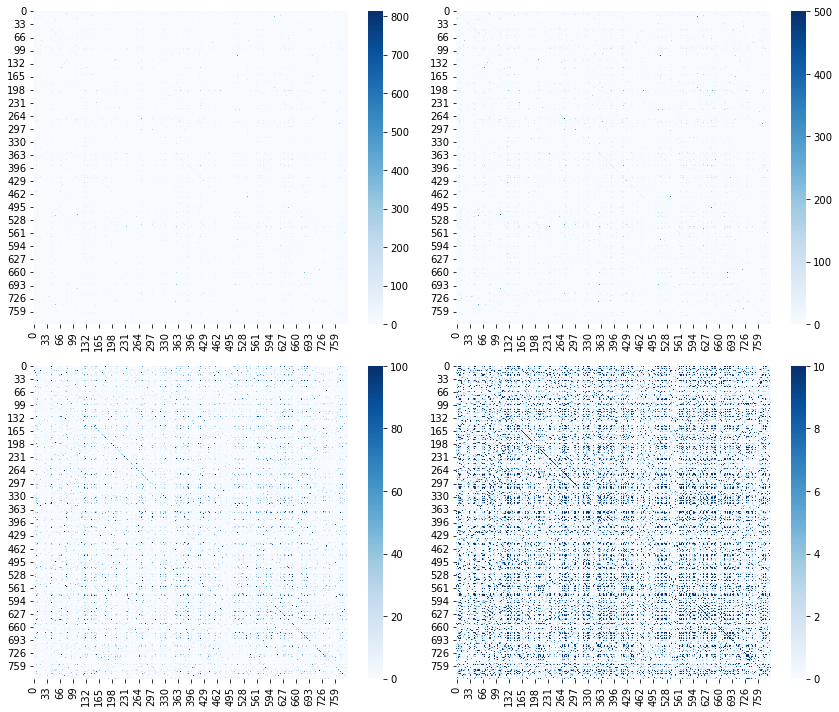

In [5]:
NY_df, NY_adj, NY_nodes_df, NY_nodes = adjacency(NY_df)

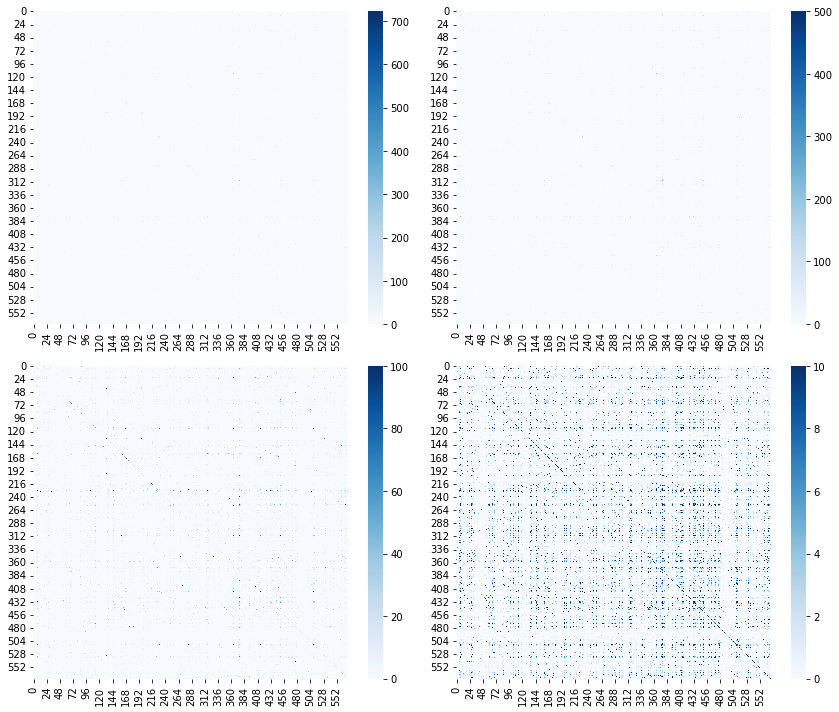

In [6]:
CHI_df, CHI_adj, CHI_nodes_df, CHI_nodes = adjacency(CHI_df)

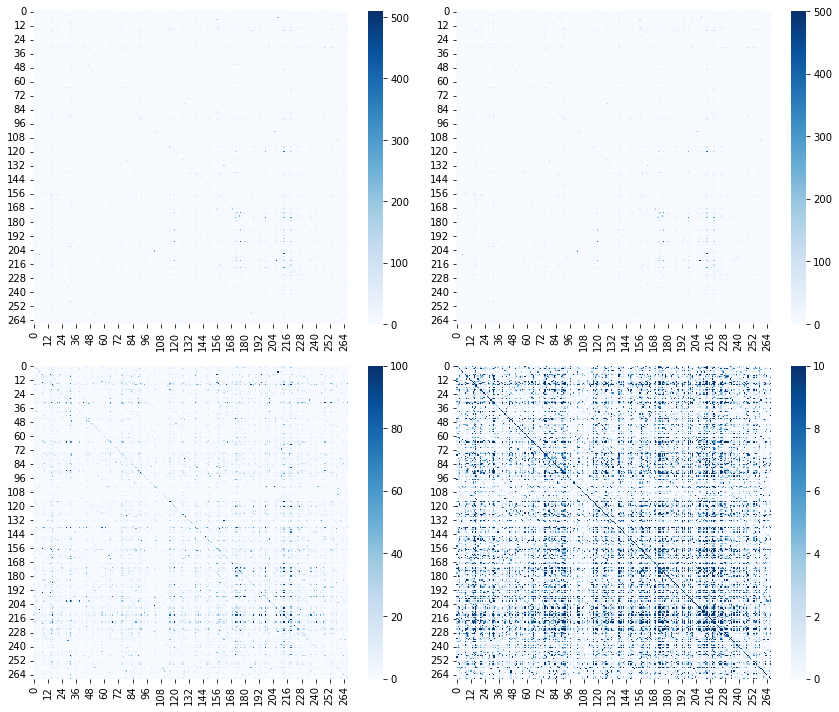

In [7]:
BOS_df, BOS_adj, BOS_nodes_df, BOS_nodes = adjacency(BOS_df)

?? Take in consideration only the giant component ??

### Degree distribution

In [8]:
def plot_probability_loglog(ax, x, y, title, cumulative=False):
    ax.loglog(x, y, 'o', markersize = 4)
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    ax.set_title(title, size = 22)
    ax.set_xlabel("k", size = 20)
    if cumulative:
        ax.set_ylabel("P_k", size = 20)
    else:
        ax.set_ylabel("p_k", size = 20)
    ax.tick_params(labelsize=18)
    ax.tick_params(labelsize=18)

def degree_distribution(adj_matrix, nodes):
    N = len(nodes.index)
    df = nodes.copy()
    d_in = adj_matrix.dot(np.ones(N))
    d_out = (adj_matrix.T).dot(np.ones(N))
    d_in = d_in.astype(int)
    d_out = d_out.astype(int)

    df['in degree'] = d_in
    df['out degree'] = d_out
    
    d_in = d_in[d_in > 0]
    d_out = d_out[d_out > 0]

    ############# in #############
    sorted_d = sorted(d_in)
    occurrence = Counter(sorted_d)
    x_in = list(occurrence.keys())
    y_in = list(occurrence.values())
    y_in = y_in/np.sum(y_in)

    Pk_in = 1 - np.cumsum(y_in) # complementary cumulative

    # set the last value of Pk (that is equal to 0 and generates problems when plotting in the log-scale) 
    # equal to 1 and sort Pk in decreasing order to put the 1 at the beginning of the array
    Pk_in[-1] = 1 
    Pk_in = sorted(Pk_in, reverse = True)

    ############# out #############
    sorted_d = sorted(d_out)
    occurrence = Counter(sorted_d)
    x_out = list(occurrence.keys())
    y_out = list(occurrence.values())
    y_out = y_out/np.sum(y_out)

    Pk_out = 1 - np.cumsum(y_out) # complementary cumulative

    # set the last value of Pk (that is equal to 0 and generates problems when plotting in the log-scale) 
    # equal to 1 and sort Pk in decreasing order to put the 1 at the beginning of the array
    Pk_out[-1] = 1 
    Pk_out = sorted(Pk_out, reverse = True)

    # Plotting    
    fig, ax = plt.subplots(2, 2, figsize = (30, 20))
    plot_probability_loglog(ax[0,0], x_in, y_in, "IN-Degree Distribution")
    plot_probability_loglog(ax[0,1], x_in, Pk_in, "IN-CCDF", True)
    plot_probability_loglog(ax[1,0], x_out, y_out, "OUT-Degree Distribution")
    plot_probability_loglog(ax[1,1], x_out, Pk_out, "OUT-CCDF", True)
    plt.show()
    
    return df

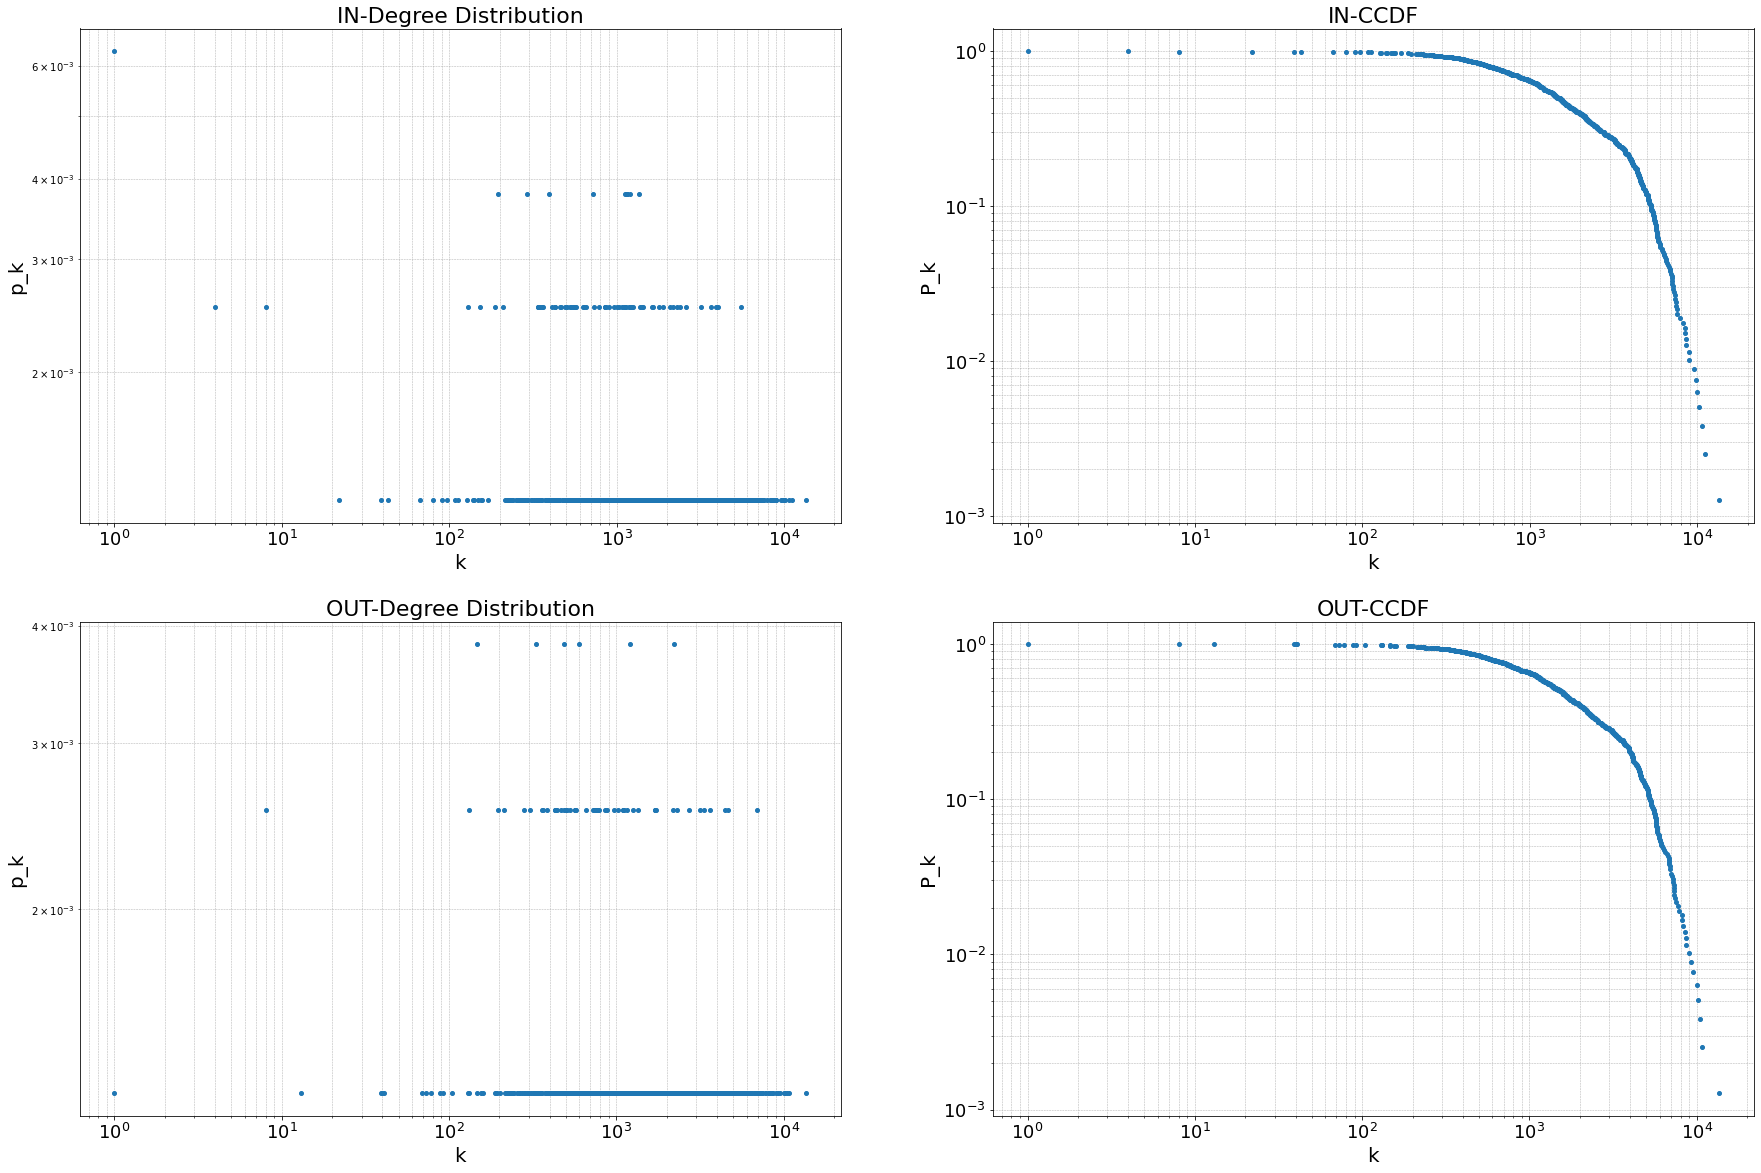

,Nodes,in degree,out degree
200,Pershing Square North,13548,13625
420,Broadway & E 22 St,11117,10714
390,E 17 St & Broadway,10671,10411
37,8 Ave & W 31 St,10194,10141
580,W 21 St & 6 Ave,10025,10009
351,West St & Chambers St,9904,8996
128,Broadway & E 14 St,9594,9450
45,W 20 St & 11 Ave,8967,8609
557,Broadway & W 60 St,8926,9248
621,Christopher St & Greenwich St,8599,8565


In [9]:
NY_scores = degree_distribution(NY_adj, NY_nodes_df)
NY_scores.sort_values('in degree', ascending=False).head(10)

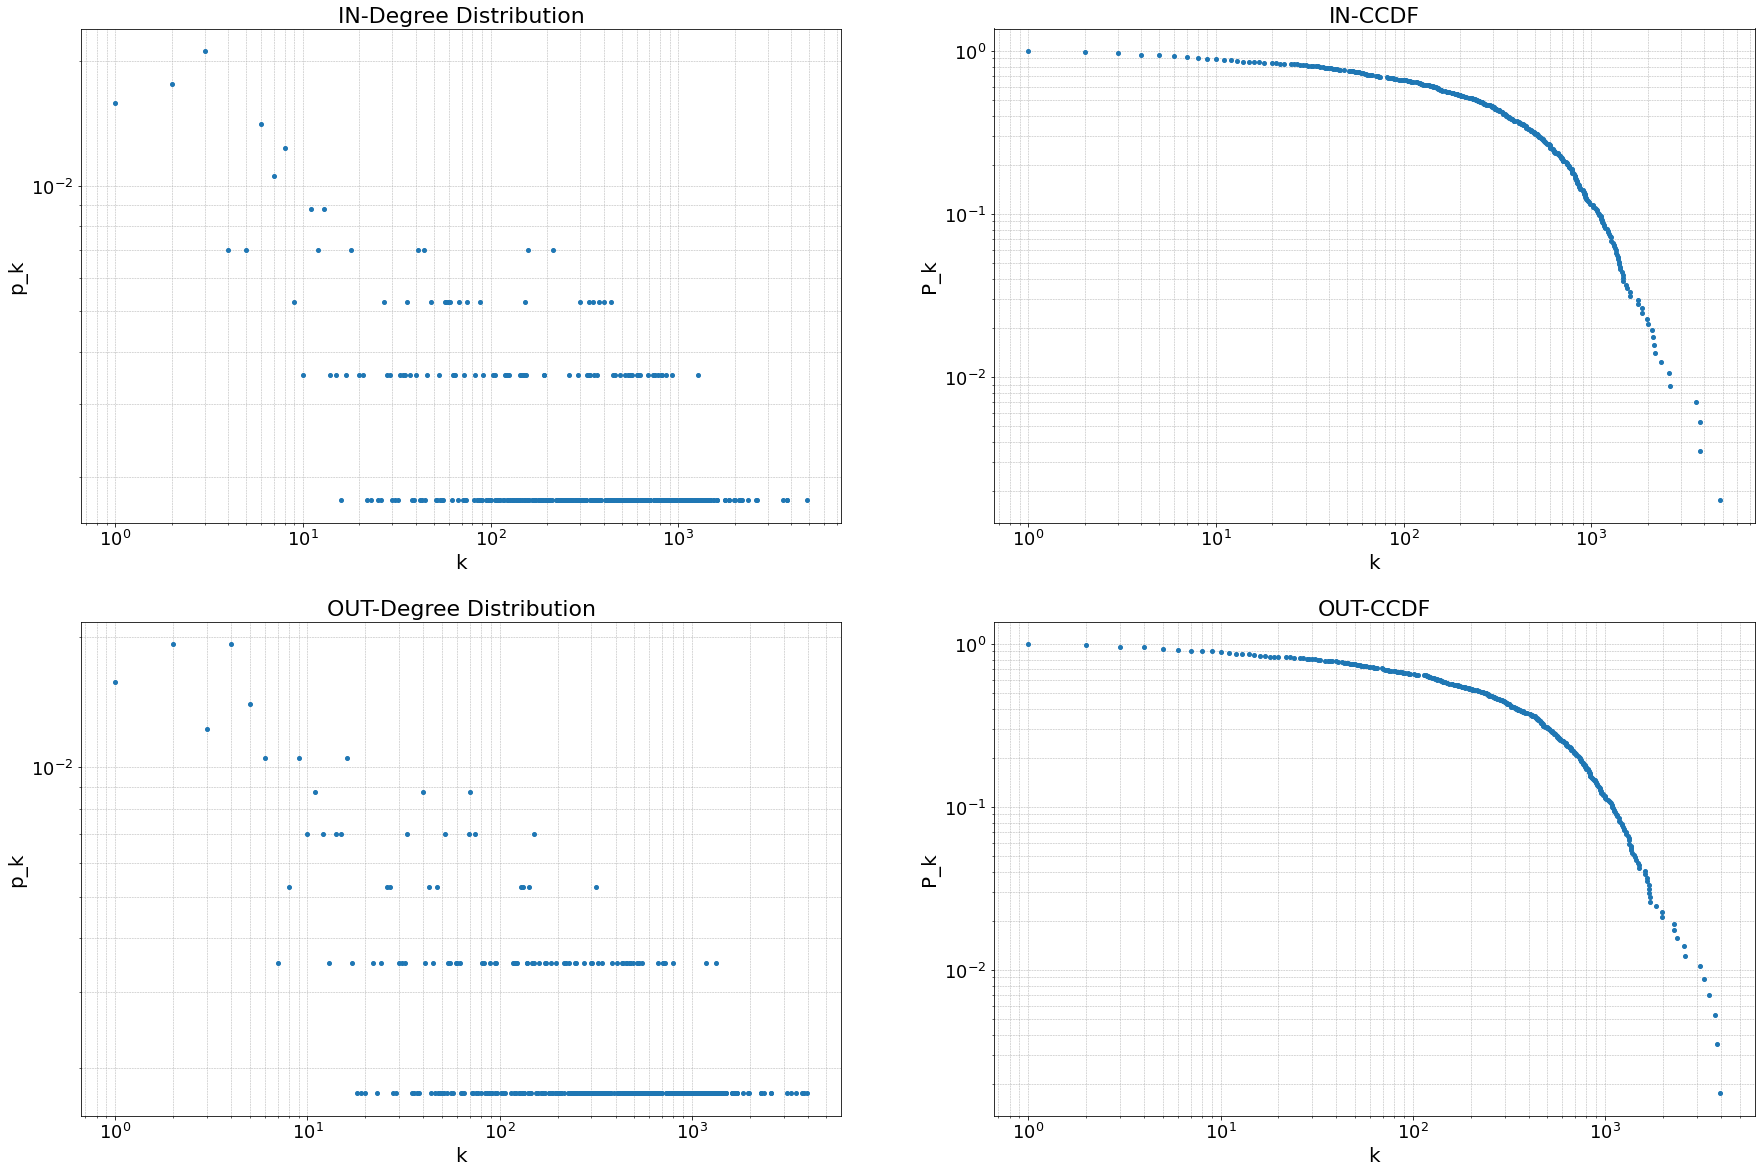

,Nodes,in degree,out degree
364,Streeter Dr & Grand Ave,4844,3710
375,Canal St & Adams St,3806,3827
35,Clinton St & Madison St,3804,3477
228,Clinton St & Washington Blvd,3619,3958
114,Lake Shore Dr & Monroe St,2630,3253
310,Michigan Ave & Washington St,2584,2292
450,Canal St & Madison St,2343,2589
551,Daley Center Plaza,2186,2366
254,Kingsbury St & Kinzie St,2156,2283
447,Michigan Ave & Oak St,2126,1965


In [10]:
CHI_scores = degree_distribution(CHI_adj, CHI_nodes_df)
CHI_scores.sort_values('in degree', ascending=False).head(10)

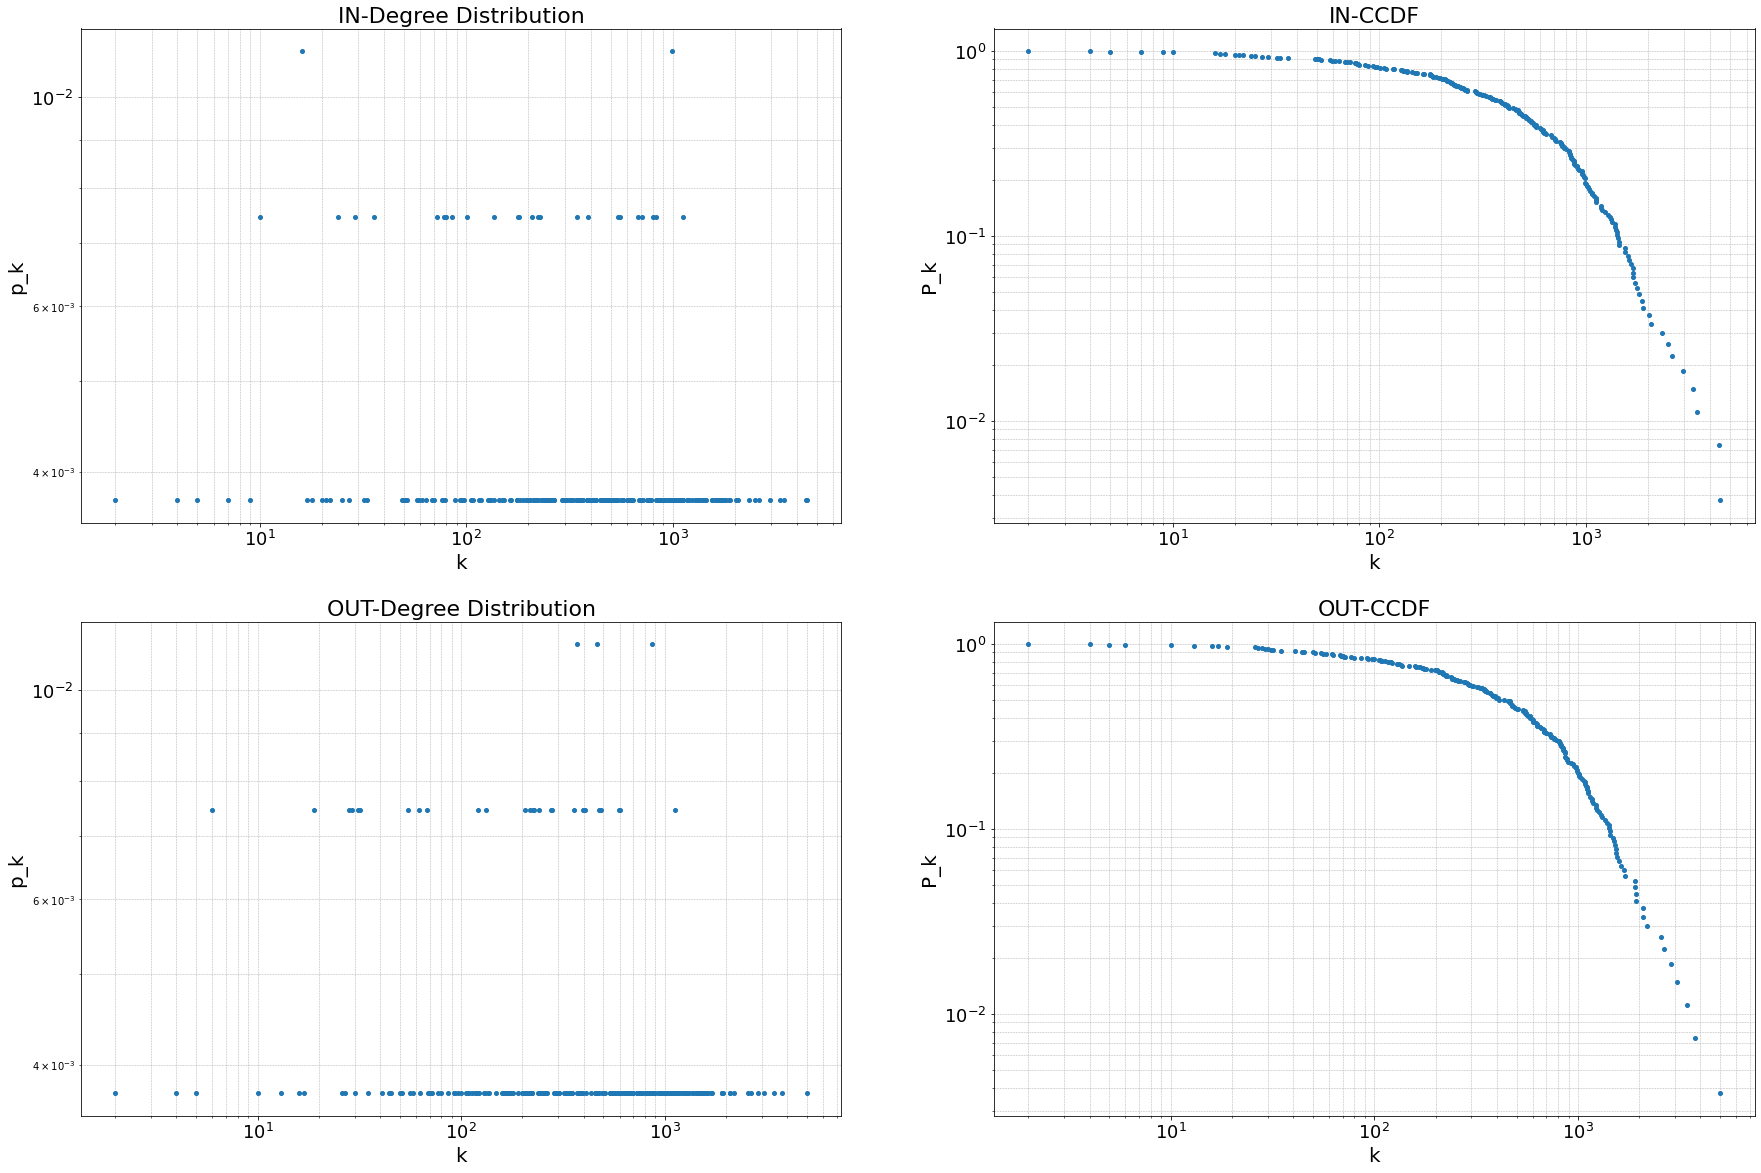

,Nodes,in degree,out degree
197,MIT Stata Center at Vassar St / Main St,4463,3761
213,MIT at Mass Ave / Amherst St,4412,4989
219,Central Square at Mass Ave / Essex St,3449,3435
138,Nashua Street at Red Auerbach Way,3313,2086
31,South Station - 700 Atlantic Ave,2968,2879
16,Harvard Square at Mass Ave/ Dunster,2603,2563
172,Kendall T,2499,3075
176,MIT Pacific St at Purrington St,2348,2644
116,Christian Science Plaza - Massachusetts Ave at...,2060,1916
120,MIT Vassar St,2030,2082


In [11]:
BOS_scores = degree_distribution(BOS_adj, BOS_nodes_df)
BOS_scores.sort_values('in degree', ascending=False).head(10)

### Hits and PageRank

In [12]:
def create_position(score_df, label):
    scores = score_df.sort_values(label, ascending=False)
    scores[label+' position']= (np.arange(len(scores.index))+1)
    return scores

In [13]:
# return DataFrame containing nodes, their hub and autority score
def hits_alg(adj, nodes, score_df=None):
    hh, aa = nx.algorithms.link_analysis.hits_alg.hits(nx.DiGraph(adj.T), tol = 1e-4/len(nx.DiGraph(adj.T)))
    df_hh = pd.DataFrame.from_dict(hh, orient='index')
    df_hh.rename({0:'hits hub'},axis = 1, inplace=True)
    df_aa = pd.DataFrame.from_dict(aa, orient='index')
    df_aa.rename({0:'hits authority'},axis = 1, inplace=True)
    df = pd.concat([nodes, df_hh, df_aa], axis=1)
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    temp = pd.merge(score_df, df, on='Nodes')
    temp.plot('in degree', 'hits authority', kind='scatter', ax=ax1)
    temp.plot('out degree', 'hits hub', kind='scatter', ax=ax2)
    plt.tight_layout()
    plt.show()
    return df

# return DataFrame containing nodes, their hub and autority score
def pagerank_alg(adj, nodes, score_df=None):
    aa = nx.algorithms.link_analysis.pagerank_alg.pagerank(nx.DiGraph(adj.T), tol = (1e-4)/len(nx.DiGraph(adj.T)))
    hh = nx.algorithms.link_analysis.pagerank_alg.pagerank(nx.DiGraph(adj), tol = (1e-4)/len(nx.DiGraph(adj.T)))
    df_hh = pd.DataFrame.from_dict(hh, orient='index')
    df_hh.rename({0:'PageRank hub'},axis = 1, inplace=True)
    df_aa = pd.DataFrame.from_dict(aa, orient='index')
    df_aa.rename({0:'PageRank authority'},axis = 1, inplace=True)
    df = pd.concat([nodes, df_hh, df_aa], axis=1)
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    temp = pd.merge(score_df, df, on='Nodes')
    temp.plot('in degree', 'PageRank authority', kind='scatter', ax=ax1)
    temp.plot('out degree', 'PageRank hub', kind='scatter', ax=ax2)
    plt.tight_layout()
    plt.show()
    return df


def hits_pagerank(adj_matrix, nodes_df, scores):
    df = hits_alg(adj_matrix, nodes_df, score_df=scores)
    scores = pd.merge(scores, df, on='Nodes')
    # ns.display_top_n(scores, 10, 'hits hub')
    # ns.display_top_n(scores, 10, 'hits authority')
    df = pagerank_alg(adj_matrix, nodes_df, score_df=scores)
    scores = pd.merge(scores, df, on='Nodes')
    # ns.display_top_n(scores, 10, 'PageRank hub')
    # ns.display_top_n(scores, 10, 'PageRank authority')

    sns.pairplot(scores)
    plt.show()
    
    scores = create_position(scores, 'in degree')
    scores = create_position(scores, 'out degree')
    scores = create_position(scores, 'hits hub')
    scores = create_position(scores, 'hits authority')
    scores = create_position(scores, 'PageRank hub')
    scores = create_position(scores, 'PageRank authority')
    scores.sort_index(inplace=True)
    n = 10
    pd.set_option('display.max_rows', n)
    display(scores.sort_values('PageRank authority', ascending=False)[['Nodes', 'in degree', 'in degree position', 'hits authority', 'hits authority position', 'PageRank authority', 'PageRank authority position']].head(n))
    display(scores.sort_values('PageRank hub', ascending=False)[['Nodes', 'out degree', 'out degree position', 'hits hub', 'hits hub position', 'PageRank hub', 'PageRank hub position']].head(n))
    
    return scores

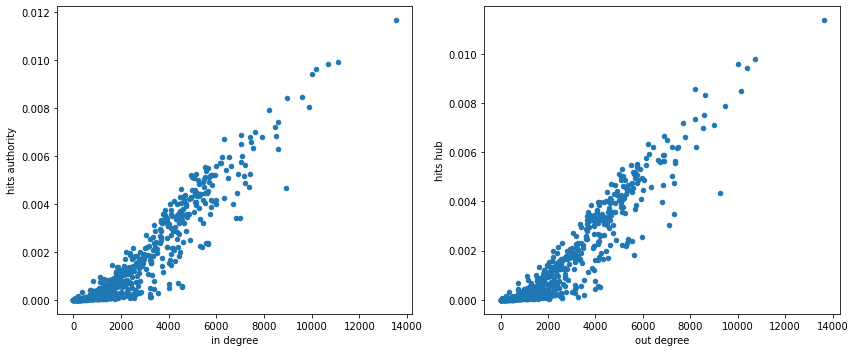

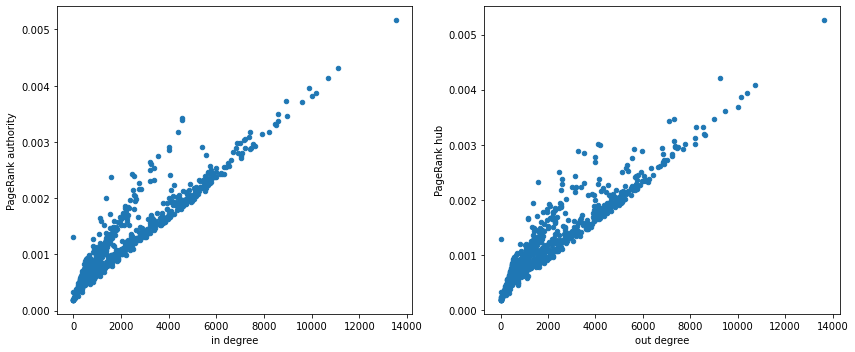

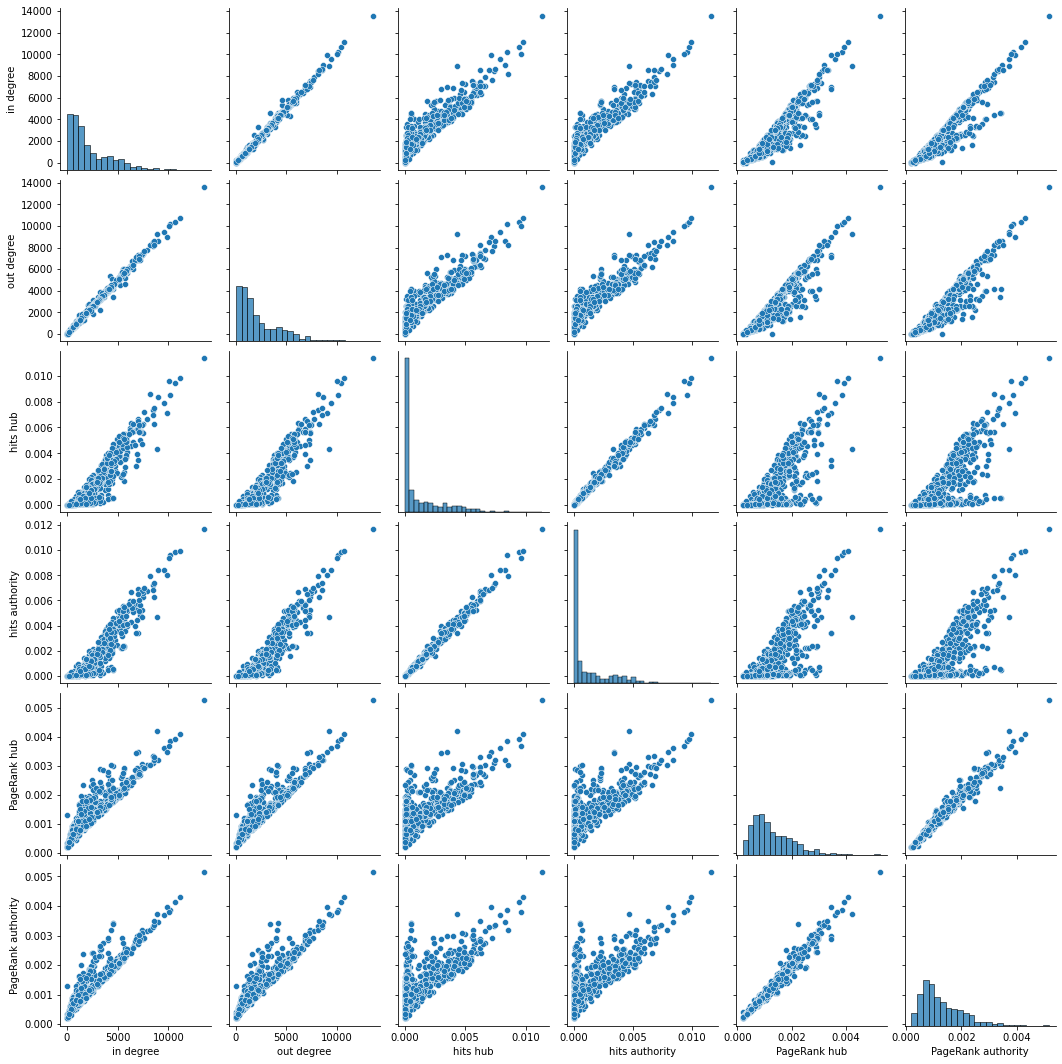

,Nodes,in degree,in degree position,hits authority,hits authority position,PageRank authority,PageRank authority position
200,Pershing Square North,13548,1,0.011645,1,0.005162,1
420,Broadway & E 22 St,11117,2,0.009920,2,0.004307,2
390,E 17 St & Broadway,10671,3,0.009812,3,0.004145,3
351,West St & Chambers St,9904,6,0.008041,8,0.003951,4
37,8 Ave & W 31 St,10194,4,0.009624,4,0.003875,5
580,W 21 St & 6 Ave,10025,5,0.009396,5,0.003808,6
557,Broadway & W 60 St,8926,9,0.004678,58,0.003722,7
128,Broadway & E 14 St,9594,7,0.008441,6,0.003710,8
690,12 Ave & W 40 St,8568,11,0.006304,21,0.003490,9
45,W 20 St & 11 Ave,8967,8,0.008402,7,0.003460,10


,Nodes,out degree,out degree position,hits hub,hits hub position,PageRank hub,PageRank hub position
200,Pershing Square North,13625,1,0.011365,1,0.005257,1
557,Broadway & W 60 St,9248,7,0.004357,75,0.004214,2
420,Broadway & E 22 St,10714,2,0.009807,2,0.004091,3
390,E 17 St & Broadway,10411,3,0.009427,4,0.003941,4
37,8 Ave & W 31 St,10141,4,0.008478,6,0.003872,5
580,W 21 St & 6 Ave,10009,5,0.009586,3,0.003681,6
128,Broadway & E 14 St,9450,6,0.007874,8,0.003612,7
351,West St & Chambers St,8996,8,0.007117,12,0.003463,8
271,Grand Army Plaza & Central Park S,7333,21,0.003497,112,0.003462,9
713,Central Park S & 6 Ave,7083,25,0.003033,142,0.003437,10


In [14]:
NY_scores = hits_pagerank(NY_adj, NY_nodes_df, NY_scores)

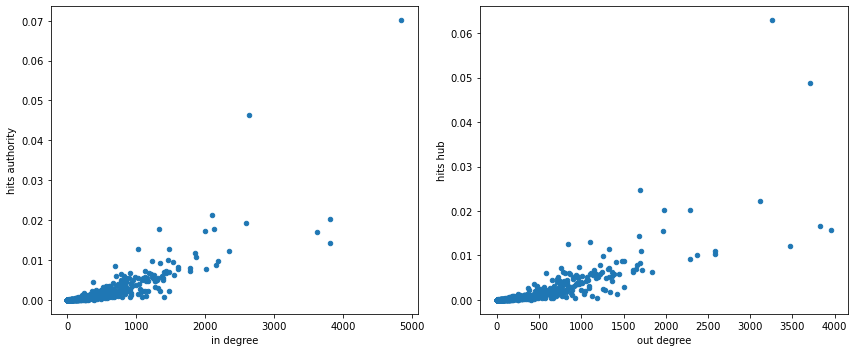

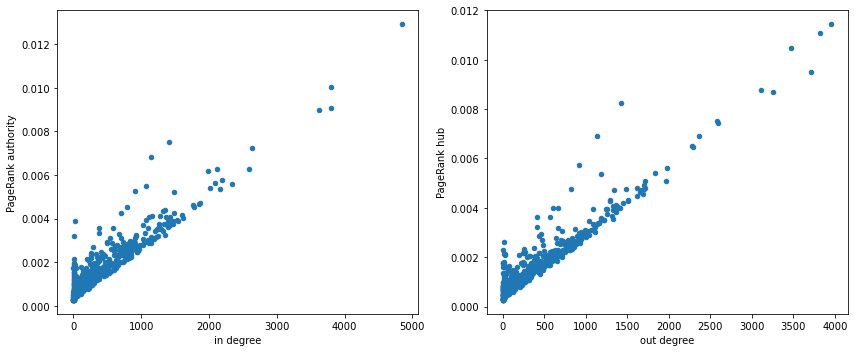

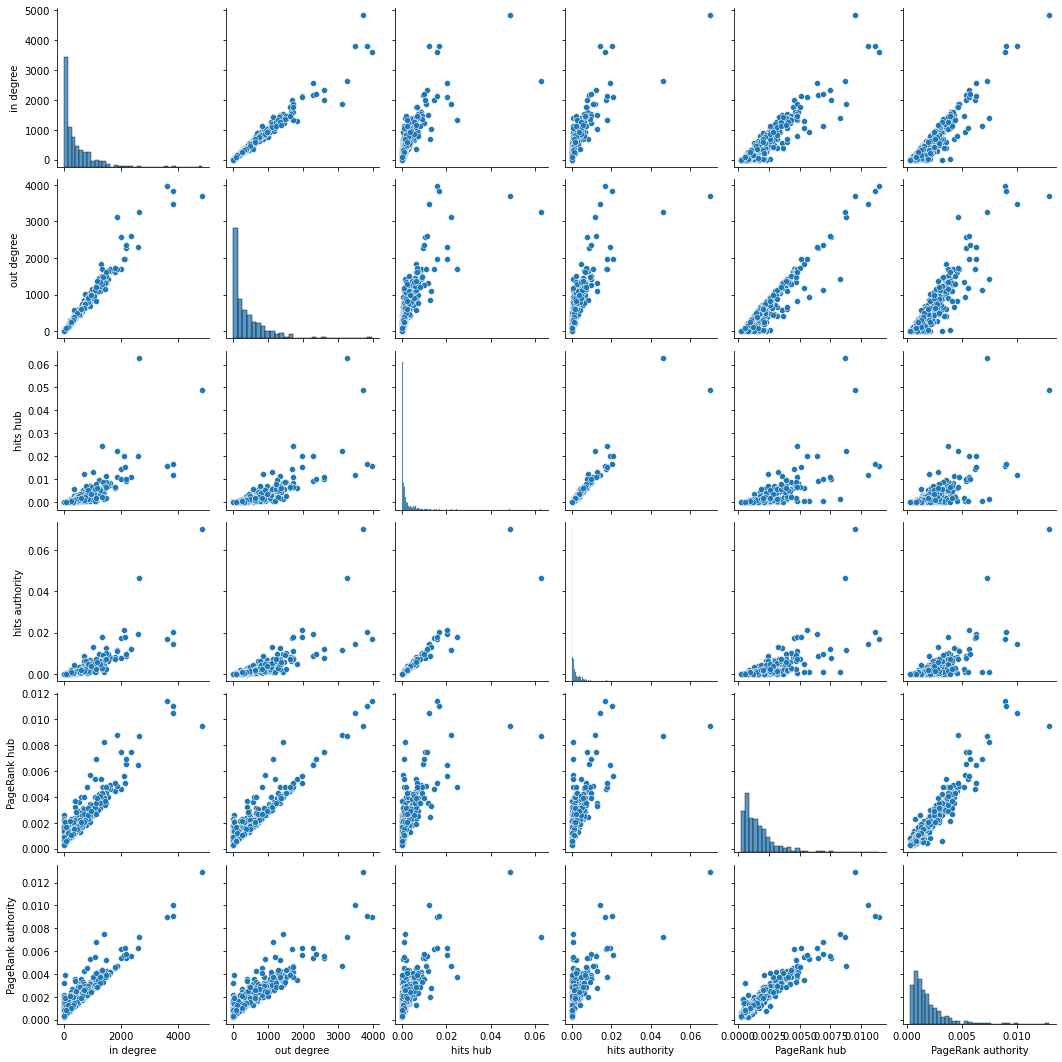

,Nodes,in degree,in degree position,hits authority,hits authority position,PageRank authority,PageRank authority position
364,Streeter Dr & Grand Ave,4844,1,0.070094,1,0.012933,1
35,Clinton St & Madison St,3804,3,0.014311,10,0.010049,2
375,Canal St & Adams St,3806,2,0.020328,4,0.009070,3
228,Clinton St & Washington Blvd,3619,4,0.017008,9,0.008976,4
133,Ellis Ave & 55th St,1406,28,0.000676,230,0.007507,5
114,Lake Shore Dr & Monroe St,2630,5,0.046260,2,0.007258,6
185,University Ave & 57th St,1138,52,0.000929,202,0.006818,7
310,Michigan Ave & Washington St,2584,6,0.019395,5,0.006295,8
447,Michigan Ave & Oak St,2126,10,0.017662,7,0.006267,9
21,Theater on the Lake,1990,13,0.017344,8,0.006200,10


,Nodes,out degree,out degree position,hits hub,hits hub position,PageRank hub,PageRank hub position
228,Clinton St & Washington Blvd,3958,1,0.015735,8,0.011449,1
375,Canal St & Adams St,3827,2,0.016651,7,0.011069,2
35,Clinton St & Madison St,3477,4,0.012114,13,0.010497,3
364,Streeter Dr & Grand Ave,3710,3,0.048865,2,0.009492,4
7,Columbus Dr & Randolph St,3112,6,0.022274,4,0.008772,5
114,Lake Shore Dr & Monroe St,3253,5,0.062892,1,0.008710,6
133,Ellis Ave & 55th St,1426,28,0.001418,153,0.008251,7
369,Franklin St & Monroe St,2585,8,0.010269,17,0.007509,8
450,Canal St & Madison St,2589,7,0.011080,15,0.007458,9
551,Daley Center Plaza,2366,9,0.010037,18,0.006909,10


In [15]:
CHI_scores = hits_pagerank(CHI_adj, CHI_nodes_df, CHI_scores)

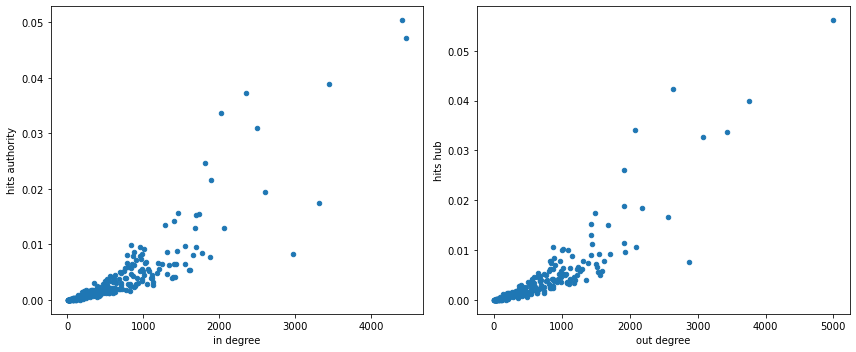

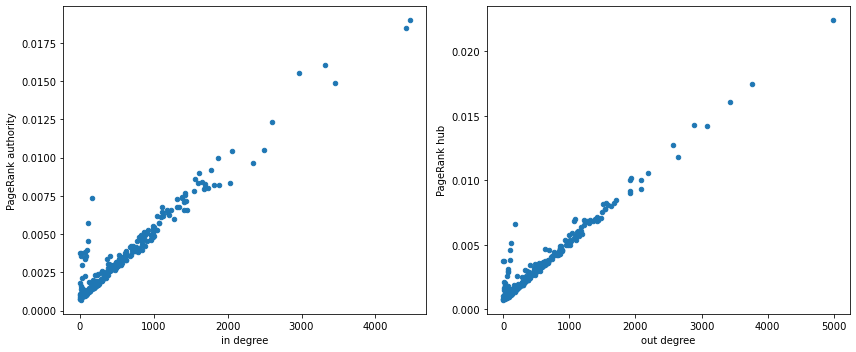

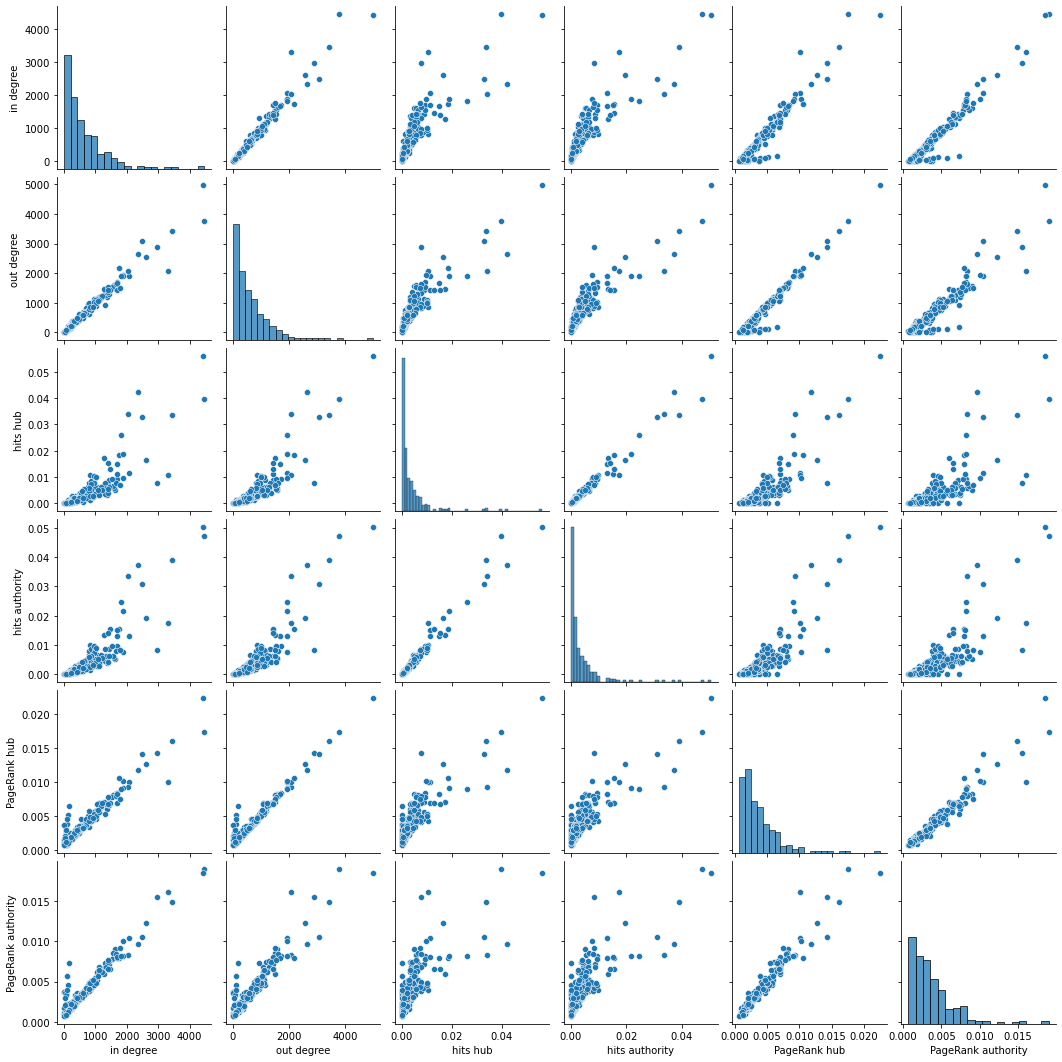

,Nodes,in degree,in degree position,hits authority,hits authority position,PageRank authority,PageRank authority position
197,MIT Stata Center at Vassar St / Main St,4463,1,0.047109,2,0.018972,1
213,MIT at Mass Ave / Amherst St,4412,2,0.050342,1,0.018503,2
138,Nashua Street at Red Auerbach Way,3313,4,0.017508,10,0.016048,3
31,South Station - 700 Atlantic Ave,2968,5,0.008236,27,0.015538,4
219,Central Square at Mass Ave / Essex St,3449,3,0.038942,3,0.014849,5
16,Harvard Square at Mass Ave/ Dunster,2603,6,0.019369,9,0.012296,6
172,Kendall T,2499,7,0.030870,6,0.010476,7
116,Christian Science Plaza - Massachusetts Ave at...,2060,9,0.013011,16,0.010429,8
157,Back Bay T Stop - Dartmouth St at Stuart St,1876,12,0.007679,33,0.009999,9
176,MIT Pacific St at Purrington St,2348,8,0.037247,4,0.009626,10


,Nodes,out degree,out degree position,hits hub,hits hub position,PageRank hub,PageRank hub position
213,MIT at Mass Ave / Amherst St,4989,1,0.056120,1,0.022396,1
197,MIT Stata Center at Vassar St / Main St,3761,2,0.039828,3,0.017426,2
219,Central Square at Mass Ave / Essex St,3435,3,0.033792,5,0.016085,3
31,South Station - 700 Atlantic Ave,2879,5,0.007659,33,0.014313,4
172,Kendall T,3075,4,0.032754,6,0.014221,5
16,Harvard Square at Mass Ave/ Dunster,2563,7,0.016678,11,0.012740,6
176,MIT Pacific St at Purrington St,2644,6,0.042249,2,0.011792,7
173,One Kendall Square at Hampshire St / Portland St,2186,8,0.018485,9,0.010596,8
157,Back Bay T Stop - Dartmouth St at Stuart St,1934,11,0.009655,22,0.010194,9
138,Nashua Street at Red Auerbach Way,2086,9,0.010621,17,0.010044,10


In [16]:
BOS_scores = hits_pagerank(BOS_adj, BOS_nodes_df, BOS_scores)

### Assortativity

In [25]:
# tuple containing the slopes of assortativity plots
def assortativity_calc(edges, adj, nodes):
    edges.drop_duplicates(inplace=True)
    n = degree_distribution(adj, nodes)
    n.rename({'Nodes': 'source','in degree': 'source in degree', 'out degree': 'source out degree'},axis=1, inplace=True)
    cross_df = pd.merge(edges, n, on="source")
    n.rename({'source': 'target','source in degree': 'target in degree', 'source out degree': 'target out degree'},axis=1, inplace=True)
    cross_df = pd.merge(cross_df, n, on="target")
    in_neigh = cross_df[['source', 'target in degree', 'target out degree']].groupby('source', as_index=False).mean()
    out_neigh = cross_df[['target', 'source in degree', 'source out degree']].groupby('target', as_index=False).mean()
    in_neigh.rename({'source':'Nodes', 'target in degree': 'Average target in degree', 'target out degree': 'Average target out degree'},axis=1, inplace=True)
    out_neigh.rename({'target':'Nodes', 'source in degree': 'Average source in degree', 'source out degree': 'Average source out degree'},axis=1, inplace=True)
    n.rename({'target': 'Nodes','target in degree': 'in degree', 'target out degree': 'out degree'},axis=1, inplace=True)
    cross_df = pd.merge(n, in_neigh, on="Nodes", how='left')
    cross_df = pd.merge(cross_df, out_neigh, on="Nodes", how='left')
    cross_df.fillna(0, inplace=True)
    x = ['out degree','out degree','in degree','in degree']
    y = ['Average target in degree', 'Average target out degree', 'Average source in degree', 'Average source out degree']
    
    fig, ax = plt.subplots(2,2,figsize=(18,15))
    
    # computing assortativity coefficient
    def calc_mu(cross_df, x, y, ax=None):
        means = cross_df[[x,y]].groupby(x, as_index=False).mean()
        means[means==0] = np.nan
        means.dropna(inplace=True)
        means['log '+x] = np.log10(means[x])
        means['log '+y] = np.log10(means[y])
        interpolation = stats.linregress(means['log '+x], means['log '+y])
        
        inter_x = np.logspace(0, max(means['log '+x]),1000)
        inter_y = inter_x**(interpolation.slope)*10**(interpolation.intercept)

        ax.loglog(cross_df[x], cross_df[y], 'o', markersize=3)
        ax.loglog(means[x], means[y], 'o', markersize=3)
        ax.plot(inter_x,inter_y,linewidth=3)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        return interpolation.slope
        
    ax = ax.reshape(4)
    mu = ()
    for e_x, e_y, e_ax in zip(x, y, ax):
        e_mu = calc_mu(cross_df, e_x, e_y, e_ax)
        mu += (e_mu, )
    plt.show()
    return mu

In [34]:
def assortativity(df, adj_matrix, nodes_df, scores, nodes):
    df.rename({'start station name': 'source','end station name': 'target'},axis=1, inplace=True)
    edges = df[['source','target']].copy()
    print(assortativity_calc(edges, adj_matrix, nodes_df))
    
    # new adjacency matrix visualization
    label = 'in degree position'
    c = df.drop(['SendId', 'RecId'],axis=1)
    another_order = scores[['Nodes', label]].copy()
    another_order[label] = another_order[label] - 1
    another_order.rename({'Nodes':'source', label: 'source ID'}, axis=1, inplace=True)
    c = pd.merge(c, another_order, on="source")
    another_order.rename({'source':'target', 'source ID': 'target ID'}, axis=1, inplace=True)
    c = pd.merge(c, another_order, on="target")
    c = c[['source ID', 'target ID', 'tripduration']]
    c_serie = c.groupby(['source ID', 'target ID']).count()
    row = np.array(c_serie.index.get_level_values(1).tolist())
    col = np.array(c_serie.index.get_level_values(0).tolist())
    val = c_serie.values
    or_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
    visualize_adj(or_adj)
    matr = or_adj.toarray()
    matr[matr>1]=1
    matr = matr - matr.T
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(matr, cmap="Blues", ax=ax)
    plt.show()

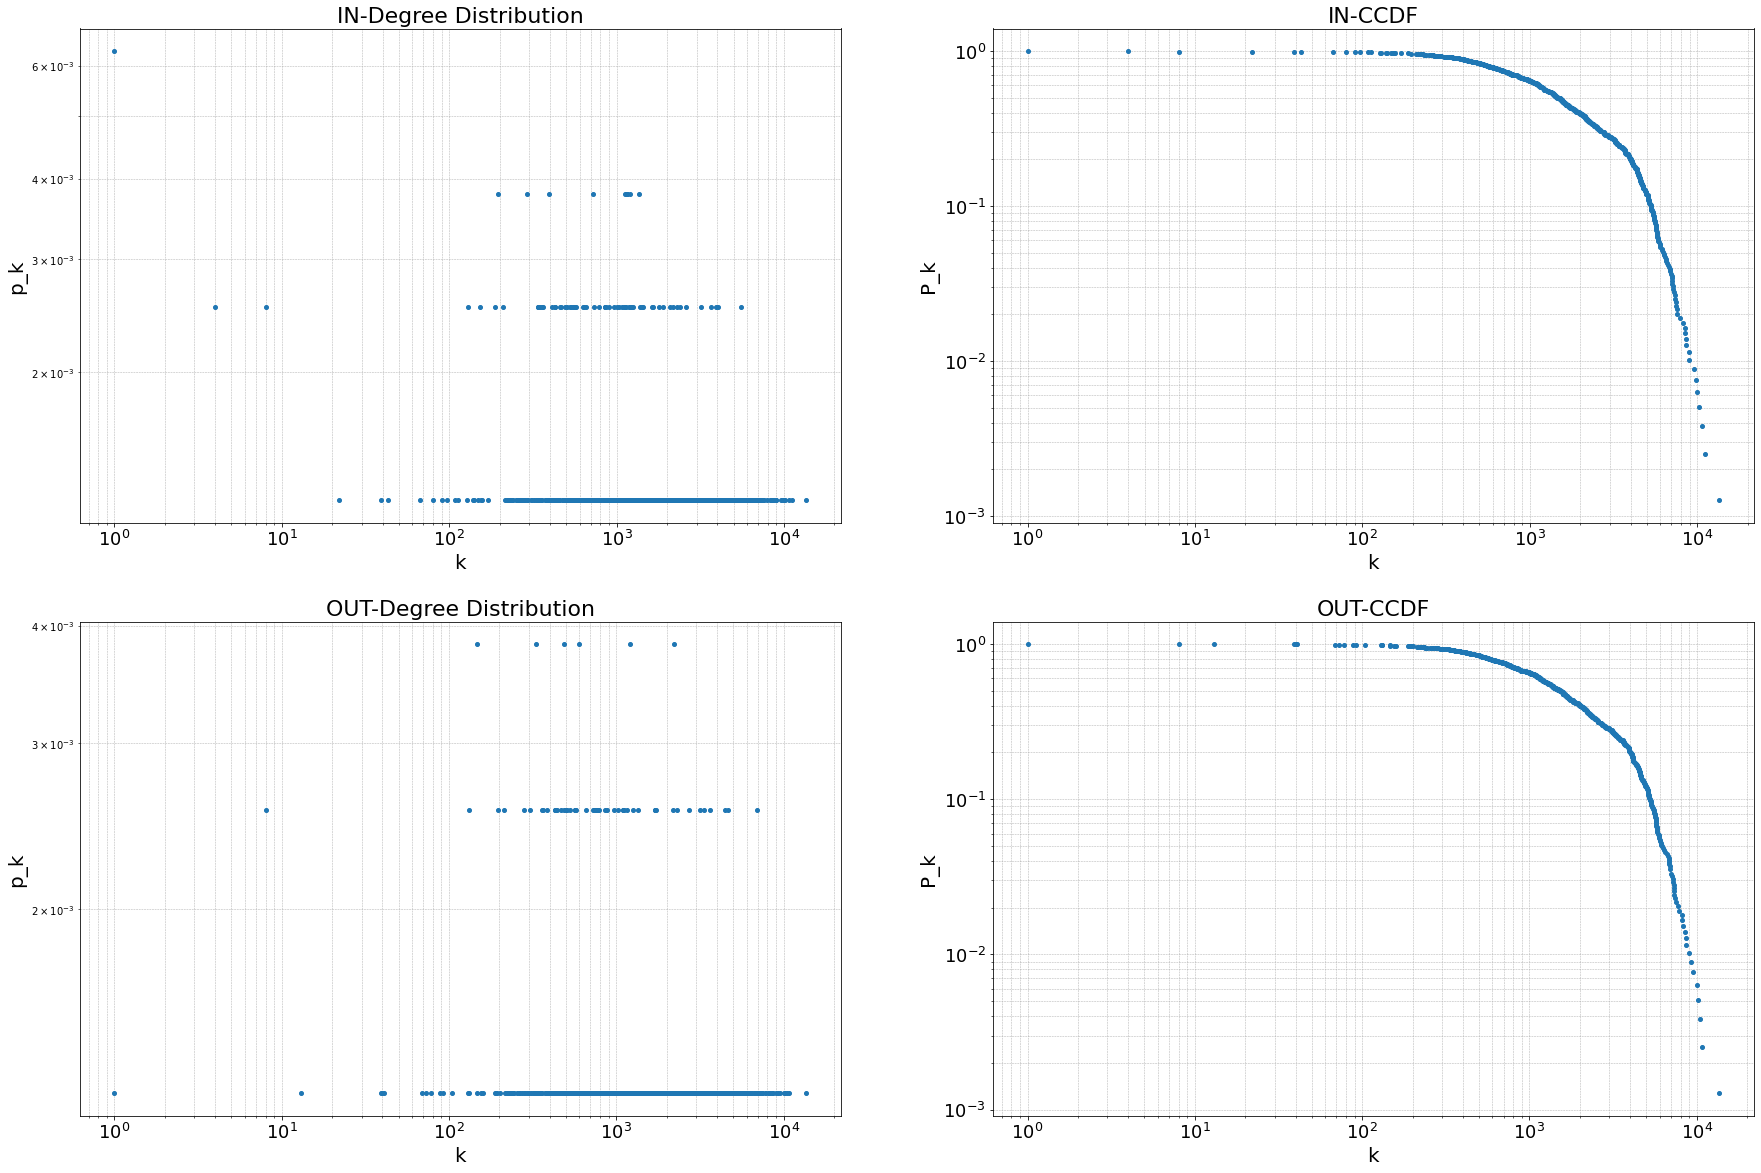

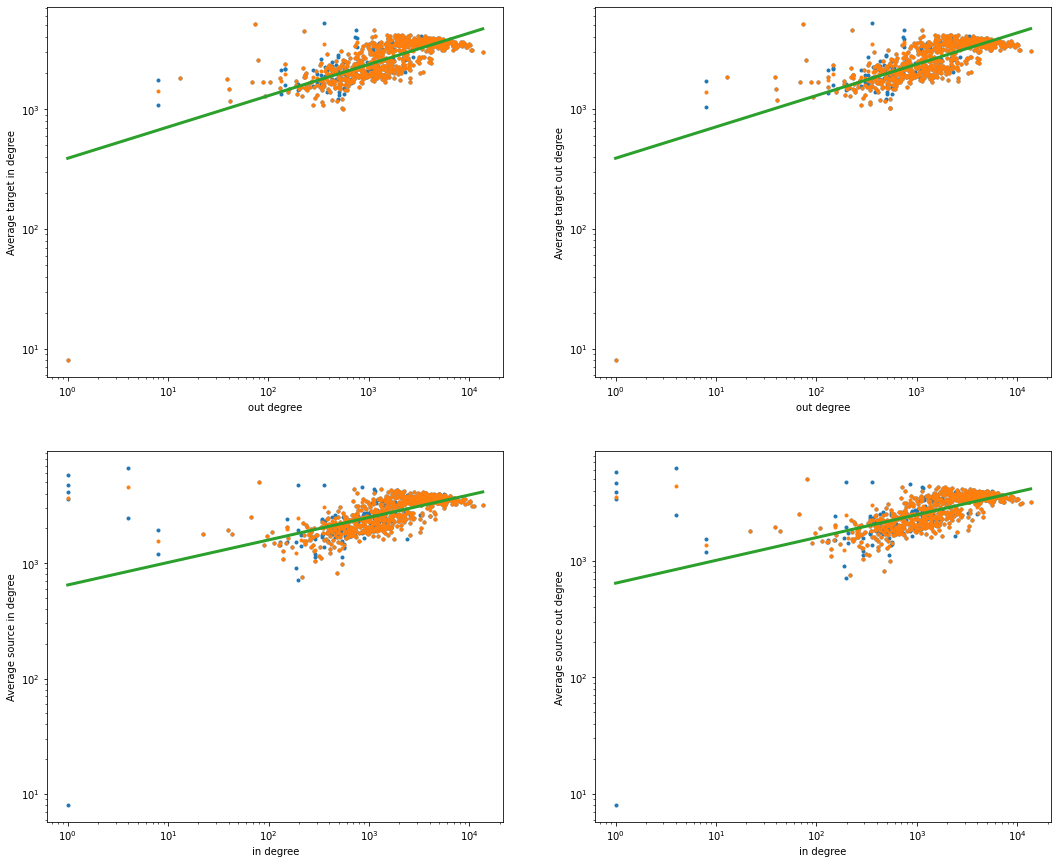

(0.2614005417482248, 0.26142234669798514, 0.19509859927195414, 0.19583699776444377)


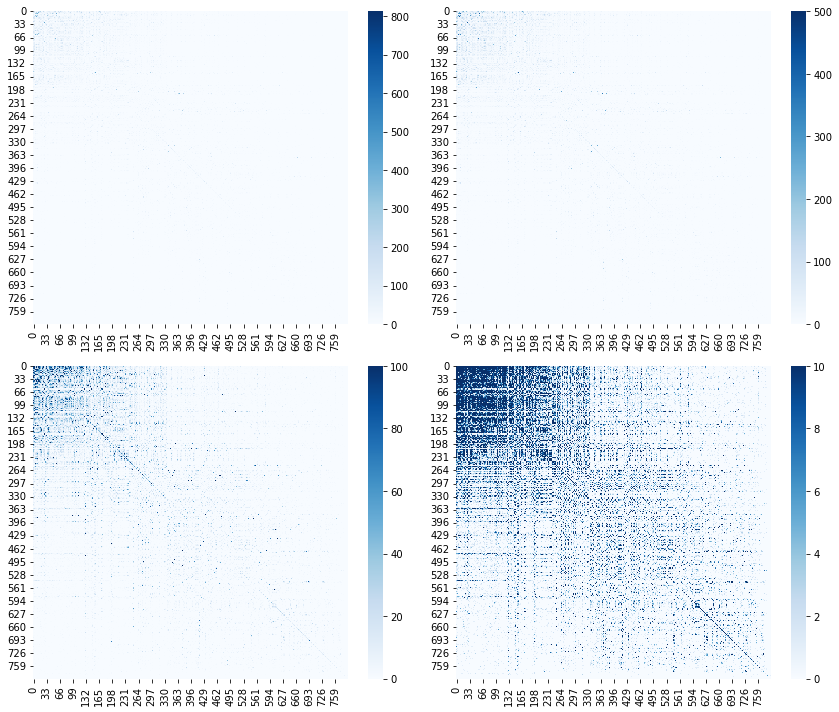

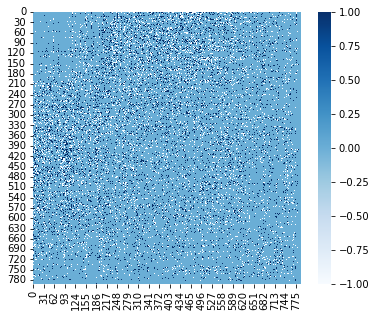

In [35]:
assortativity(NY_df, NY_adj, NY_nodes_df, NY_scores, NY_nodes)